In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from sklearn.linear_model import LinearRegression
sns.set_theme(style='ticks')

# EDA (Exploration Data Analysis)

In [2]:
df = pd.read_csv('dataset/final_dataset.csv', parse_dates = ['Timestamp'])

In [3]:
df['Total_Price'] = round(df['Price'] * df['Swap_Value'], 4)

In [4]:
df['To_Chain_ID_1'] = np.where(df['To_Chain_ID_1'] == 'BNB CHAIN', 'Smart Chain', df['To_Chain_ID_1'])
df['From_Chain_ID_1'] = np.where(df['From_Chain_ID_1'] == 'BNB CHAIN', 'Smart Chain', df['From_Chain_ID_1'])

In [ ]:
print('Total transactions:\t\t', df.shape[0])
print('First transaction on:\t\t', df['Timestamp'].min())
print('Last transaction on:\t\t', df['Timestamp'].max())
print('Number of token:\t\t', len(df['Swap_Token_Symbol'].unique()))
print('Number of address:\t\t', len(df['From'].unique()))
print('Number of sender chain:\t\t', len(df['From_Chain_ID_1'].unique()))
print('Number of receiver chain:\t', len(df['To_Chain_ID_1'].unique()))

### Monetary

In [17]:
print('Total volume of transaction (USD):\t', df['Total_Price'].sum(), '$')
print('Total volume of fees (USD):\t\t', round((df['Price'] * df['Fee']).sum(), 2), '$')

Total volume of transaction (USD):	 1778842387.63 $
Total volume of fees (USD):		 860150.52 $


### Total value in USD

In [14]:
from matplotlib.ticker import EngFormatter
eng_fmt = EngFormatter(places=0)

In [17]:
chains = ['Fantom','Smart Chain','Avalanche','Polygon', 'Ethereum']
data = pd.DataFrame(columns=['From','To','Val'])
data_dict = {}

for chain_from in chains:
    for chain_to in chains:
        if chain_from == chain_to:
            continue
        else:
            temp = df[(df['From_Chain_ID_1'] == chain_from) & (df['To_Chain_ID_1'] == chain_to)]
            res = round((temp['Price'] * temp['Swap_Value']).sum(), 2)
            data_dict[chain_from + ' -> ' + chain_to] = res
            data = data.append({
                'From': chain_from,
                'To': chain_to,
                'Val': res
            }, ignore_index=True)
            
data = data.pivot('From', 'To', 'Val')

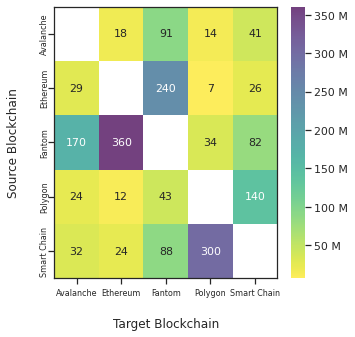

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.heatmap(data, annot=True, annot_kws={"size": 11}, linewidths=.5, cmap='viridis_r',cbar_kws={"format": eng_fmt}, ax=ax , linewidth=0., alpha=.75)
plot.set_xlabel('Target Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_ylabel('Source Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, horizontalalignment='center', **{'fontsize': 8})
plot.set_yticklabels(plot.get_yticklabels(), rotation = 90, horizontalalignment='center', **{'fontsize': 8})

for t in ax.texts: t.set_text(eng_fmt(float(t.get_text()))[:-2])
for _, spine in plot.spines.items():
    spine.set_visible(True)
plt.show()
fig.savefig('imgs/Heatmaps/Total value swaps in USD.pdf', dpi=100, bbox_inches='tight')

In [38]:
data_dict = dict(sorted(data_dict.items(), key=lambda item: item[1], reverse=True))
data_dict

{'Fantom -> Ethereum': 360879726.59,
 'BNB CHAIN -> Polygon': 301338860.75,
 'Ethereum -> Fantom': 241662349.77,
 'Fantom -> Avalanche': 172855053.79,
 'Polygon -> BNB CHAIN': 138880783.67,
 'Avalanche -> Fantom': 90802331.57,
 'BNB CHAIN -> Fantom': 87776526.73,
 'Fantom -> BNB CHAIN': 81555416.12,
 'Polygon -> Fantom': 42509575.14,
 'Avalanche -> BNB CHAIN': 40570536.43,
 'Fantom -> Polygon': 34004481.44,
 'BNB CHAIN -> Avalanche': 32424808.9,
 'Ethereum -> Avalanche': 29028833.54,
 'Ethereum -> BNB CHAIN': 25647948.34,
 'Polygon -> Avalanche': 24128711.65,
 'BNB CHAIN -> Ethereum': 24059035.79,
 'Avalanche -> Ethereum': 17533526.46,
 'Avalanche -> Polygon': 14202924.96,
 'Polygon -> Ethereum': 11975622.62,
 'Ethereum -> Polygon': 7005332.91}

### Mean value per transaction per chain

In [22]:
chains = ['Fantom','Smart Chain','Avalanche','Polygon', 'Ethereum']
data = pd.DataFrame(columns=['From','To','Val'])
data_dict = {}

for chain_from in chains:
    for chain_to in chains:
        if chain_from == chain_to:
            continue
        else:
            temp = df[(df['From_Chain_ID_1'] == chain_from) & (df['To_Chain_ID_1'] == chain_to)]
            res = round((temp['Price'] * temp['Swap_Value']).mean(), 2)
            data_dict[chain_from + ' -> ' + chain_to] = res
            data = data.append({
                'From': chain_from,
                'To': chain_to,
                'Val': res
            }, ignore_index=True)
            
data = data.pivot('From', 'To', 'Val')

/tmp/ipykernel_233721/1087358644.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['20 K','20 K', '40 K', '60 K', '80 K', '100 K', '120 K'])


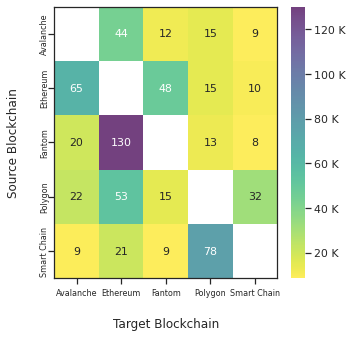

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
plot = sns.heatmap(data, annot=True, annot_kws={"size": 11}, linewidths=.5, fmt='.0f', cmap='viridis_r', ax=ax, linewidth=0., alpha=.75)
plot.set_xlabel('Target Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_ylabel('Source Blockchain', **{'fontsize':12}, labelpad=20)

plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, horizontalalignment='center', **{'fontsize': 8})
plot.set_yticklabels(plot.get_yticklabels(), rotation = 90, horizontalalignment='center', **{'fontsize': 8})
for t in ax.texts: t.set_text(eng_fmt(float(t.get_text()))[:-2])
for _, spine in plot.spines.items():
    spine.set_visible(True)

cbar = ax.collections[0].colorbar
#cbar.set_ticks([0, .2, .75, 1])
cbar.set_ticklabels(['20 K','20 K', '40 K', '60 K', '80 K', '100 K', '120 K'])
plt.show()
fig.savefig('imgs/Heatmaps/Mean value swaps in USD.pdf', dpi=100, bbox_inches='tight')

In [42]:
data_dict = dict(sorted(data_dict.items(), key=lambda item: item[1], reverse=True))
data_dict

{'Fantom -> Ethereum': 130281.49,
 'BNB CHAIN -> Polygon': 77784.94,
 'Ethereum -> Avalanche': 64508.52,
 'Polygon -> Ethereum': 53462.6,
 'Ethereum -> Fantom': 47977.44,
 'Avalanche -> Ethereum': 43724.5,
 'Polygon -> BNB CHAIN': 31700.7,
 'Polygon -> Avalanche': 22487.15,
 'BNB CHAIN -> Ethereum': 20975.62,
 'Fantom -> Avalanche': 20264.37,
 'Polygon -> Fantom': 15058.3,
 'Ethereum -> Polygon': 14841.81,
 'Avalanche -> Polygon': 14733.32,
 'Fantom -> Polygon': 13190.26,
 'Avalanche -> Fantom': 11817.07,
 'Ethereum -> BNB CHAIN': 10026.56,
 'BNB CHAIN -> Avalanche': 9047.1,
 'BNB CHAIN -> Fantom': 8930.36,
 'Avalanche -> BNB CHAIN': 8829.28,
 'Fantom -> BNB CHAIN': 8461.86}

### Number of transactions per chain

In [25]:
chains = ['Fantom','Smart Chain','Avalanche','Polygon', 'Ethereum']
data = pd.DataFrame(columns=['From','To','Val'])
data_dict = {}

for chain_from in chains:
    for chain_to in chains:
        if chain_from == chain_to:
            continue
        else:
            temp = df[(df['From_Chain_ID_1'] == chain_from) & (df['To_Chain_ID_1'] == chain_to)]
            data_dict[chain_from + ' -> ' + chain_to] = len(temp)
            data = data.append({
                'From': chain_from,
                'To': chain_to,
                'Val': len(temp)
            }, ignore_index=True)
            
data.Val = data.Val.astype(int)
data = data.pivot('From', 'To', 'Val')

In [26]:
total_transactions = data['Avalanche'].sum()+data['Fantom'].sum()+data['Smart Chain'].sum()+data['Polygon'].sum()+data['Ethereum'].sum()
data['Fantom'] = (data['Fantom']*100)/total_transactions
data['Smart Chain'] = (data['Smart Chain']*100)/total_transactions
data['Polygon'] = (data['Polygon']*100)/total_transactions
data['Ethereum'] = (data['Ethereum']*100)/total_transactions
data['Avalanche'] = (data['Avalanche']*100)/total_transactions

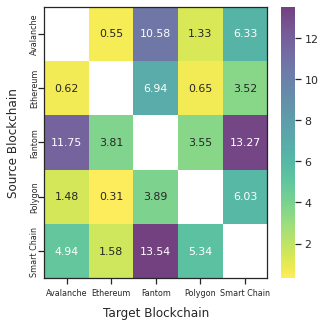

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
plot = sns.heatmap(data, annot=True, annot_kws={"size": 11}, fmt='.2f', cmap='viridis_r',  ax=ax, linewidth=0., alpha=.75)
plot.set_xlabel('Target Blockchain', **{'fontsize': 12}, labelpad=10)
plot.set_ylabel('Source Blockchain', **{'fontsize': 12}, labelpad=10)

plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, horizontalalignment='center', **{'fontsize': 8})
plot.set_yticklabels(plot.get_yticklabels(), rotation = 90, horizontalalignment='center', **{'fontsize': 8})
for t in ax.texts: t.set_text(t.get_text())
for _, spine in plot.spines.items():
    spine.set_visible(True)
plt.show()
fig.savefig('imgs/Heatmaps/Percentage of transactions.pdf', dpi=100, bbox_inches='tight')


In [46]:
data_dict = dict(sorted(data_dict.items(), key=lambda item: item[1], reverse=True))
data_dict

{'BNB CHAIN -> Fantom': 9829,
 'Fantom -> BNB CHAIN': 9638,
 'Fantom -> Avalanche': 8530,
 'Avalanche -> Fantom': 7684,
 'Ethereum -> Fantom': 5037,
 'Avalanche -> BNB CHAIN': 4595,
 'Polygon -> BNB CHAIN': 4381,
 'BNB CHAIN -> Polygon': 3874,
 'BNB CHAIN -> Avalanche': 3584,
 'Polygon -> Fantom': 2823,
 'Fantom -> Ethereum': 2770,
 'Fantom -> Polygon': 2578,
 'Ethereum -> BNB CHAIN': 2558,
 'BNB CHAIN -> Ethereum': 1147,
 'Polygon -> Avalanche': 1073,
 'Avalanche -> Polygon': 964,
 'Ethereum -> Polygon': 472,
 'Ethereum -> Avalanche': 450,
 'Avalanche -> Ethereum': 401,
 'Polygon -> Ethereum': 224}

### Fee per chain

In [28]:
chains = ['Fantom','Smart Chain','Avalanche','Polygon', 'Ethereum']
data = pd.DataFrame(columns=['From','To','Val'])
data_dict = {}

for chain_from in chains:
    for chain_to in chains:
        if chain_from == chain_to:
            continue
        else:
            temp = df[(df['From_Chain_ID_1'] == chain_from) & (df['To_Chain_ID_1'] == chain_to)]
            res = round((temp['Price'] * temp['Fee']).sum(), 2)
            data_dict[chain_from + ' -> ' + chain_to] = res
            data = data.append({
                'From': chain_from,
                'To': chain_to,
                'Val': res
            }, ignore_index=True)
            
data = data.pivot('From', 'To', 'Val')

/tmp/ipykernel_233721/11674976.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['50 K','50 K', '100 K', '150 K', '200 K', '250 K'])


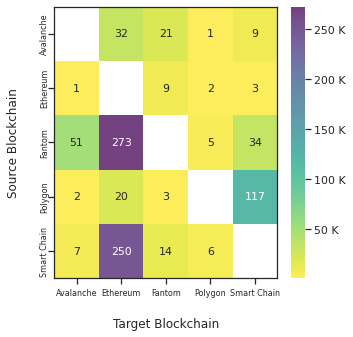

In [29]:
fig, ax = plt.subplots(figsize=(5,5))
plot = sns.heatmap(data, annot=True, annot_kws={"size": 11}, fmt='.0f', cmap='viridis_r', cbar_kws={"format": eng_fmt}, ax=ax, linewidth=0., alpha=.75)
plot.set_xlabel('Target Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_ylabel('Source Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, horizontalalignment='center', **{'fontsize': 8})
plot.set_yticklabels(plot.get_yticklabels(), rotation = 90, horizontalalignment='center', **{'fontsize': 8})
for t in ax.texts: t.set_text(eng_fmt(float(t.get_text()))[:-2])
for _, spine in plot.spines.items():
    spine.set_visible(True)
cbar = ax.collections[0].colorbar
#cbar.set_ticks([0, .2, .75, 1])
cbar.set_ticklabels(['50 K','50 K', '100 K', '150 K', '200 K', '250 K'])
    
plt.show()
fig.savefig('imgs/Heatmaps/Total fee in USD.pdf', dpi=100, bbox_inches='tight')

In [68]:
data_dict = dict(sorted(data_dict.items(), key=lambda item: item[1], reverse=True))
data_dict

{'Fantom -> Ethereum': 272936.67,
 'BNB CHAIN -> Ethereum': 249662.63,
 'Polygon -> BNB CHAIN': 117379.85,
 'Fantom -> Avalanche': 51292.39,
 'Fantom -> BNB CHAIN': 33852.63,
 'Avalanche -> Ethereum': 32118.6,
 'Avalanche -> Fantom': 20780.64,
 'Polygon -> Ethereum': 20315.78,
 'BNB CHAIN -> Fantom': 13668.58,
 'Avalanche -> BNB CHAIN': 9377.8,
 'Ethereum -> Fantom': 9087.42,
 'BNB CHAIN -> Avalanche': 7056.67,
 'BNB CHAIN -> Polygon': 5550.85,
 'Fantom -> Polygon': 4771.0,
 'Polygon -> Fantom': 3223.95,
 'Ethereum -> BNB CHAIN': 2515.78,
 'Polygon -> Avalanche': 2230.98,
 'Ethereum -> Polygon': 2031.48,
 'Ethereum -> Avalanche': 1165.31,
 'Avalanche -> Polygon': 1131.49}

### Mean fee per transaction

In [30]:
chains = ['Fantom','Smart Chain','Avalanche','Polygon', 'Ethereum']
data = pd.DataFrame(columns=['From','To','Val'])
data_dict = {}

for chain_from in chains:
    for chain_to in chains:
        if chain_from == chain_to:
            continue
        else:
            temp = df[(df['From_Chain_ID_1'] == chain_from) & (df['To_Chain_ID_1'] == chain_to)]
            res = round((temp['Price'] * temp['Fee']).mean(), 2)
            data_dict[chain_from + ' -> ' + chain_to] = res
            data = data.append({
                'From': chain_from,
                'To': chain_to,
                'Val': res
            }, ignore_index=True)
            
data = data.pivot('From', 'To', 'Val')

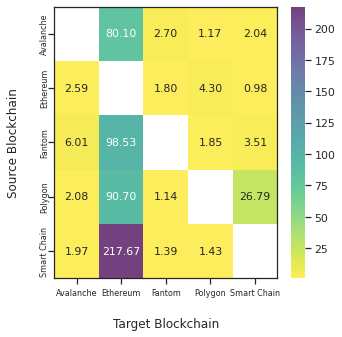

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
plot = sns.heatmap(data, annot=True, annot_kws={"size": 11}, fmt='.2f', cmap='viridis_r', ax=ax, linewidth=0., alpha=.75)
plot.set_xlabel('Target Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_ylabel('Source Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, horizontalalignment='center', **{'fontsize': 8})
plot.set_yticklabels(plot.get_yticklabels(), rotation = 90, horizontalalignment='center', **{'fontsize': 8})
#for t in ax.texts: t.set_text(eng_fmt(float(t.get_text())))
for _, spine in plot.spines.items():
    spine.set_visible(True)
plt.show()
fig.savefig('imgs/Heatmaps/Mean fee in USD.pdf', dpi=100, bbox_inches='tight')

In [54]:
data_dict = dict(sorted(data_dict.items(), key=lambda item: item[1], reverse=True))
data_dict

{'BNB CHAIN -> Ethereum': 217.67,
 'Fantom -> Ethereum': 98.53,
 'Polygon -> Ethereum': 90.7,
 'Avalanche -> Ethereum': 80.1,
 'Polygon -> BNB CHAIN': 26.79,
 'Fantom -> Avalanche': 6.01,
 'Ethereum -> Polygon': 4.3,
 'Fantom -> BNB CHAIN': 3.51,
 'Avalanche -> Fantom': 2.7,
 'Ethereum -> Avalanche': 2.59,
 'Polygon -> Avalanche': 2.08,
 'Avalanche -> BNB CHAIN': 2.04,
 'BNB CHAIN -> Avalanche': 1.97,
 'Fantom -> Polygon': 1.85,
 'Ethereum -> Fantom': 1.8,
 'BNB CHAIN -> Polygon': 1.43,
 'BNB CHAIN -> Fantom': 1.39,
 'Avalanche -> Polygon': 1.17,
 'Polygon -> Fantom': 1.14,
 'Ethereum -> BNB CHAIN': 0.98}

### Mean time execution per transaction per chain

In [32]:
chains = ['Fantom','Smart Chain','Avalanche','Polygon', 'Ethereum']
data = pd.DataFrame(columns=['From','To','Val'])
data_dict = {}

for chain_from in chains:
    for chain_to in chains:
        if chain_from == chain_to:
            continue
        else:
            temp = df[(df['From_Chain_ID_1'] == chain_from) & (df['To_Chain_ID_1'] == chain_to)]
            res = round((temp['Time_Execution']).mean(), 2)
            data_dict[chain_from + ' -> ' + chain_to] = res
            data = data.append({
                'From': chain_from,
                'To': chain_to,
                'Val': res
            }, ignore_index=True)
            
data = data.pivot('From', 'To', 'Val')

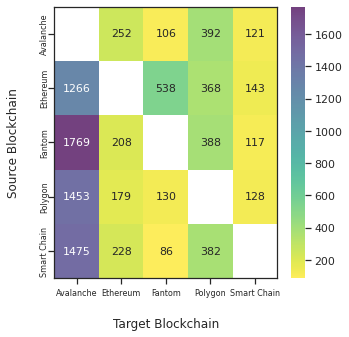

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
plot = sns.heatmap(data, annot=True, annot_kws={"size": 11}, fmt='.2f', cmap='viridis_r', ax=ax, linewidth=0., alpha=.75)
plot.set_xlabel('Target Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_ylabel('Source Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, horizontalalignment='center', **{'fontsize': 8})
plot.set_yticklabels(plot.get_yticklabels(), rotation = 90, horizontalalignment='center', **{'fontsize': 8})
for t in ax.texts: t.set_text(int(float(t.get_text())))
for _, spine in plot.spines.items():
    spine.set_visible(True)
plt.show()
fig.savefig('imgs/Heatmaps/Mean time execution per swaps.pdf', dpi=100, bbox_inches='tight')

In [58]:
data_dict = dict(sorted(data_dict.items(), key=lambda item: item[1], reverse=True))
data_dict

{'Fantom -> Avalanche': 1769.88,
 'BNB CHAIN -> Avalanche': 1475.69,
 'Polygon -> Avalanche': 1453.35,
 'Ethereum -> Avalanche': 1266.63,
 'Ethereum -> Fantom': 538.35,
 'Avalanche -> Polygon': 392.93,
 'Fantom -> Polygon': 388.65,
 'BNB CHAIN -> Polygon': 382.22,
 'Ethereum -> Polygon': 368.04,
 'Avalanche -> Ethereum': 252.07,
 'BNB CHAIN -> Ethereum': 228.84,
 'Fantom -> Ethereum': 208.28,
 'Polygon -> Ethereum': 179.19,
 'Ethereum -> BNB CHAIN': 143.54,
 'Polygon -> Fantom': 130.28,
 'Polygon -> BNB CHAIN': 128.62,
 'Avalanche -> BNB CHAIN': 121.67,
 'Fantom -> BNB CHAIN': 117.1,
 'Avalanche -> Fantom': 106.04,
 'BNB CHAIN -> Fantom': 86.5}

### Mean confirmations per transaction per chain

In [34]:
chains = ['Fantom','Smart Chain','Avalanche','Polygon', 'Ethereum']
data = pd.DataFrame(columns=['From','To','Val'])
data_dict = {}

for chain_from in chains:
    for chain_to in chains:
        if chain_from == chain_to:
            continue
        else:
            temp = df[(df['From_Chain_ID_1'] == chain_from) & (df['To_Chain_ID_1'] == chain_to)]
            res = round((temp['Confirmations']).mean(), 2)
            data_dict[chain_from + ' -> ' + chain_to] = res
            data = data.append({
                'From': chain_from,
                'To': chain_to,
                'Val': res
            }, ignore_index=True)
            
data = data.pivot('From', 'To', 'Val')

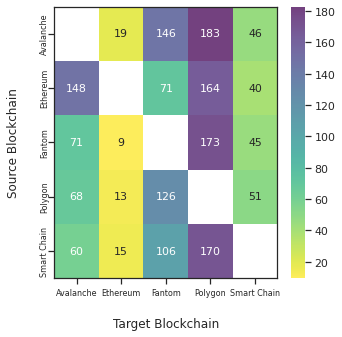

In [35]:
fig, ax = plt.subplots(figsize=(5,5))
plot = sns.heatmap(data, annot=True, annot_kws={"size": 11}, fmt='.0f', cmap='viridis_r', ax=ax, linewidth=0., alpha=.75)
plot.set_xlabel('Target Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_ylabel('Source Blockchain', **{'fontsize':12}, labelpad=20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, horizontalalignment='center', **{'fontsize': 8})
plot.set_yticklabels(plot.get_yticklabels(), rotation = 90, horizontalalignment='center', **{'fontsize': 8})
for _, spine in plot.spines.items():
    spine.set_visible(True)
plt.show()
fig.savefig('imgs/Heatmaps/Mean confirmations per swap.pdf', dpi=100, bbox_inches='tight')



In [337]:
data_dict = dict(sorted(data_dict.items(), key=lambda item: item[1], reverse=True))
data_dict

{'Avalanche -> Polygon': 182.96,
 'Fantom -> Polygon': 172.57,
 'BNB CHAIN -> Polygon': 169.74,
 'Ethereum -> Polygon': 164.26,
 'Ethereum -> Avalanche': 148.14,
 'Avalanche -> Fantom': 146.08,
 'Polygon -> Fantom': 125.7,
 'BNB CHAIN -> Fantom': 106.29,
 'Ethereum -> Fantom': 71.21,
 'Fantom -> Avalanche': 70.59,
 'Polygon -> Avalanche': 68.07,
 'BNB CHAIN -> Avalanche': 59.89,
 'Polygon -> BNB CHAIN': 50.68,
 'Avalanche -> BNB CHAIN': 45.71,
 'Fantom -> BNB CHAIN': 44.96,
 'Ethereum -> BNB CHAIN': 39.6,
 'Avalanche -> Ethereum': 18.61,
 'BNB CHAIN -> Ethereum': 15.43,
 'Polygon -> Ethereum': 12.89,
 'Fantom -> Ethereum': 9.49}

### Platform data

In [167]:
print('Mean confirmations per transaction:', round(df['Confirmations'].mean(), 2))
print('Mean time execution per transaction:', round(df['Time_Execution'].mean(), 2))
print('\n- Ethereum:')
print('Mean confirmations per transaction (from):\t', round(df[df['From_Chain_ID_1'] == 'Ethereum']['Confirmations'].mean(), 2))
print('Mean confirmations per transaction (to):\t', round(df[df['To_Chain_ID_1'] == 'Ethereum']['Confirmations'].mean(), 2))
print('Mean time execution per transaction (from):\t', round(df[df['From_Chain_ID_1'] == 'Ethereum']['Time_Execution'].mean(), 2))
print('Mean time execution per transaction (to):\t', round(df[df['To_Chain_ID_1'] == 'Ethereum']['Time_Execution'].mean(), 2))
print('\n- BNB:')
print('Mean confirmations per transaction (from):\t', round(df[df['From_Chain_ID_1'] == 'BNB CHAIN']['Confirmations'].mean(), 2))
print('Mean confirmations per transaction (to):\t', round(df[df['To_Chain_ID_1'] == 'BNB CHAIN']['Confirmations'].mean(), 2))
print('Mean time execution per transaction (from):\t', round(df[df['From_Chain_ID_1'] == 'BNB CHAIN']['Time_Execution'].mean(), 2))
print('Mean time execution per transaction (to):\t', round(df[df['To_Chain_ID_1'] == 'BNB CHAIN']['Time_Execution'].mean(), 2))
print('\n- Fantom:')
print('Mean confirmations per transaction (from):\t', round(df[df['From_Chain_ID_1'] == 'Fantom']['Confirmations'].mean(), 2))
print('Mean confirmations per transaction (to):\t', round(df[df['To_Chain_ID_1'] == 'Fantom']['Confirmations'].mean(), 2))
print('Mean time execution per transaction (from):\t', round(df[df['From_Chain_ID_1'] == 'Fantom']['Time_Execution'].mean(), 2))
print('Mean time execution per transaction (to):\t', round(df[df['To_Chain_ID_1'] == 'Fantom']['Time_Execution'].mean(), 2))
print('\n- Avalanche:')
print('Mean confirmations per transaction (from):\t', round(df[df['From_Chain_ID_1'] == 'Avalanche']['Confirmations'].mean(), 2))
print('Mean confirmations per transaction (to):\t', round(df[df['To_Chain_ID_1'] == 'Avalanche']['Confirmations'].mean(), 2))
print('Mean time execution per transaction (from):\t', round(df[df['From_Chain_ID_1'] == 'Avalanche']['Time_Execution'].mean(), 2))
print('Mean time execution per transaction (to):\t', round(df[df['To_Chain_ID_1'] == 'Avalanche']['Time_Execution'].mean(), 2))
print('\n- Polygon:')
print('Mean confirmations per transaction (from):\t', round(df[df['From_Chain_ID_1'] == 'Polygon']['Confirmations'].mean(), 2))
print('Mean confirmations per transaction (to):\t', round(df[df['To_Chain_ID_1'] == 'Polygon']['Confirmations'].mean(), 2))
print('Mean time execution per transaction (from):\t', round(df[df['From_Chain_ID_1'] == 'Polygon']['Time_Execution'].mean(), 2))
print('Mean time execution per transaction (to):\t', round(df[df['To_Chain_ID_1'] == 'Polygon']['Time_Execution'].mean(), 2))

Mean confirmations per transaction: 85.59
Mean time execution per transaction: 466.78

- Ethereum:
Mean confirmations per transaction (from):	 70.94
Mean confirmations per transaction (to):	 11.96
Mean time execution per transaction (from):	 448.81
Mean time execution per transaction (to):	 215.9

- BNB:
Mean confirmations per transaction (from):	 104.95
Mean confirmations per transaction (to):	 45.66
Mean time execution per transaction (from):	 427.6
Mean time execution per transaction (to):	 123.67

- Fantom:
Mean confirmations per transaction (from):	 64.07
Mean confirmations per transaction (to):	 113.54
Mean time execution per transaction (from):	 757.13
Mean time execution per transaction (to):	 186.99

- Avalanche:
Mean confirmations per transaction (from):	 111.14
Mean confirmations per transaction (to):	 70.14
Mean time execution per transaction (from):	 135.86
Mean time execution per transaction (to):	 1651.05

- Polygon:
Mean confirmations per transaction (from):	 76.79
Mean

### Sender Chains

In [168]:
df['From_Chain_ID_1'].value_counts()

Fantom       23516
BNB CHAIN    18434
Avalanche    13644
Ethereum      8517
Polygon       8501
Name: From_Chain_ID_1, dtype: int64

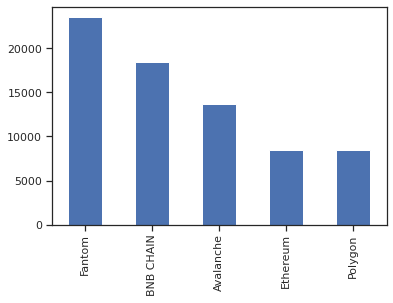

In [17]:
df['From_Chain_ID_1'].value_counts().plot(kind='bar')


### Receiver Chains

In [170]:
df['To_Chain_ID_1'].value_counts()

Fantom       25373
BNB CHAIN    21172
Avalanche    13637
Polygon       7888
Ethereum      4542
Name: To_Chain_ID_1, dtype: int64

<AxesSubplot:>

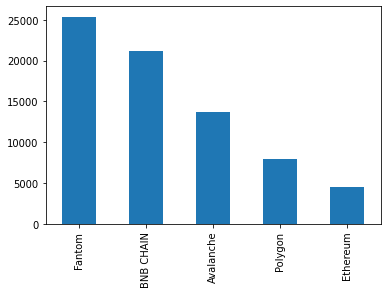

In [171]:
df['To_Chain_ID_1'].value_counts().plot(kind='bar')

### Addresses with the highest number of SWAP transactions

In [21]:
df['From'].value_counts().head(20)

32775

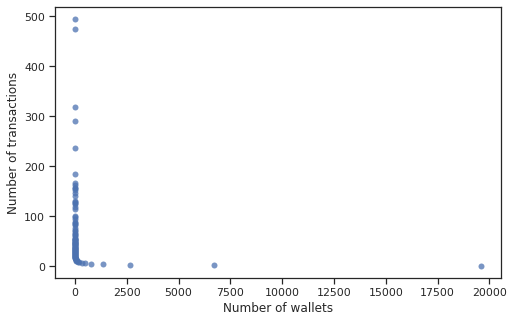

In [234]:
from collections import defaultdict

ntrans= df['From'].value_counts().tolist()
fq= defaultdict( int )
for n in ntrans:
    fq[n] += 1
    
naddress=[]
ntransactions=[]
for key in fq:
    ntransactions.append(key)
    naddress.append(fq[key])
    
dftrans= pd.DataFrame(list(zip(naddress, ntransactions)), columns =['addresses', 'transactions'])
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(dftrans['addresses'],dftrans['transactions'],linewidth=0., alpha=.75)
ax.set_xlabel('Number of wallets',**{'fontsize': 12})
ax.set_ylabel('Number of transactions',**{'fontsize': 12})

plt.show()

fig.savefig('imgs/Grafici/Transazioni per indirizzi.pdf', dpi=100, bbox_inches='tight')

In [6]:
len(dftrans.loc[dftrans['transactions']<dftrans['transactions'].mean()])/len(dftrans)

0.6896551724137931

In [8]:
import powerlaw

results = powerlaw.Fit(list(dftrans['transactions']))
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')
print(R,p)

Calculating best minimal value for power law fit
xmin progress: 00%
xmin progress: 01%
xmin progress: 02%
xmin progress: 03%
xmin progress: 04%
xmin progress: 05%
xmin progress: 06%
xmin progress: 08%
xmin progress: 09%
xmin progress: 10%
xmin progress: 11%
xmin progress: 12%
xmin progress: 13%
xmin progress: 15%
xmin progress: 16%
xmin progress: 17%
xmin progress: 18%
xmin progress: 19%
xmin progress: 20%
xmin progress: 22%
xmin progress: 23%
xmin progress: 24%
xmin progress: 25%
xmin progress: 26%
xmin progress: 27%
xmin progress: 29%
xmin progress: 30%
xmin progress: 31%
xmin progress: 32%
xmin progress: 33%
xmin progress: 34%
xmin progress: 36%
xmin progress: 37%
xmin progress: 38%
xmin progress: 39%
xmin progress: 40%
xmin progress: 41%
xmin progress: 43%
xmin progress: 44%
xmin progress: 45%
xmin progress: 46%
xmin progress: 47%
xmin progress: 48%
xmin progress: 50%
xmin progress: 51%
xmin progress: 52%
xmin progress: 53%
xmin progress: 54%
xmin progress: 55%
xmin progress: 56%
x

### Most swapped token

In [40]:
df['Swap_Token_Symbol'].value_counts()

USDC      24202
USDT      11353
BNB        6562
AVAX       4429
MIM        4185
          ...  
SKYRIM        1
HSF           1
CLH           1
SPIRIT        1
BAO           1
Name: Swap_Token_Symbol, Length: 313, dtype: int64

### Transaction distribution

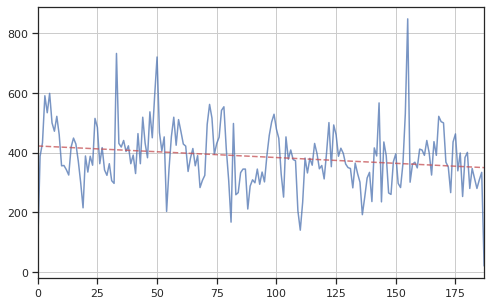

In [47]:
# fit linear model
plt.figure( figsize = (8, 5))
X = [i for i in range(0, len(timedata))]
X = np.reshape(X, (len(X), 1))
y = timedata.values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.xlim(0,187)
plt.plot(y,alpha=.75)
plt.grid()
plt.plot(trend, 'r--',alpha=.75)

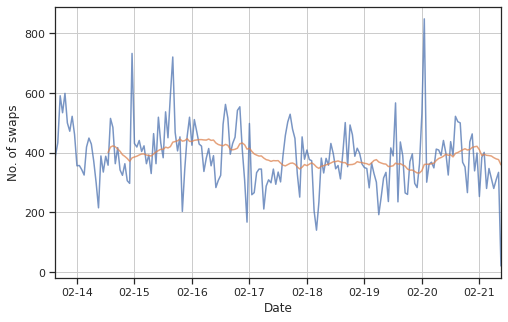

In [70]:
timedata=df.groupby(pd.Grouper(key='Timestamp',freq='H')).count()['_ID']
rolling_avg = timedata.rolling(24).mean()
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.lineplot(data = timedata,alpha=.75)
ax = sns.lineplot( data = rolling_avg,alpha=.75,)
ax.set_xlabel('Date',**{'fontsize': 12})
ax.set_ylabel('No. of swaps',**{'fontsize': 12})

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

plt.xticks(rotation = 0, horizontalalignment='center')
plt.xlim(pd.to_datetime('2022-02-13 14:42:43'),pd.to_datetime('2022-02-21 09:03:50'))
plt.grid()
plt.show()
fig.savefig('imgs/Grafici/Distribuzione transazioni(rollin_gavg).pdf', dpi=100, bbox_inches='tight')

### Swapped money distribution

<AxesSubplot:xlabel='Timestamp'>

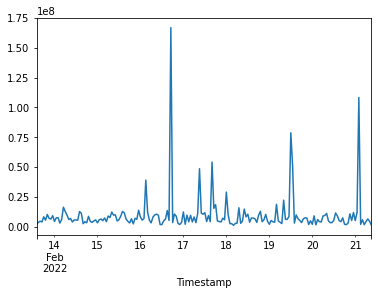

In [178]:
df.groupby(pd.Grouper(key='Timestamp',freq='H')).sum()['Total_Price'].plot()

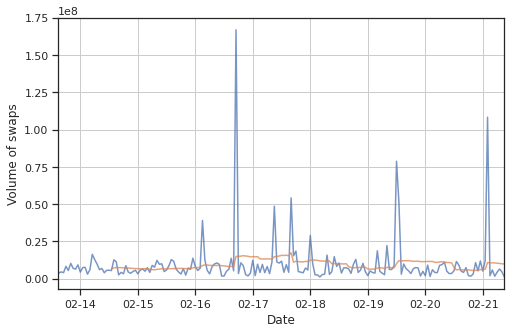

In [72]:
timevalue= df.groupby(pd.Grouper(key='Timestamp',freq='H')).sum()['Total_Price']
rolling_avg = timevalue.rolling(24).mean()
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.lineplot(data = timevalue, alpha=.75)
ax = sns.lineplot( data = rolling_avg ,alpha=.75,)
ax.set_xlabel('Date',**{'fontsize': 12})
ax.set_ylabel('Volume of swaps',**{'fontsize': 12})

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

plt.xticks(rotation = 0, horizontalalignment='center')
plt.xlim(pd.to_datetime('2022-02-13 14:42:43'),pd.to_datetime('2022-02-21 09:03:50'))
plt.grid()
plt.show()

fig.savefig('imgs/Grafici/Distribuzione volume scambiato.pdf', dpi=100, bbox_inches='tight')

### Most frequent swapped chain

In [179]:
df.groupby(['From_Chain_ID_1','To_Chain_ID_1']).agg(['count'])[('_ID','count')].sort_values(ascending=False)

From_Chain_ID_1  To_Chain_ID_1
BNB CHAIN        Fantom           9829
Fantom           BNB CHAIN        9638
                 Avalanche        8530
Avalanche        Fantom           7684
Ethereum         Fantom           5037
Avalanche        BNB CHAIN        4595
Polygon          BNB CHAIN        4381
BNB CHAIN        Polygon          3874
                 Avalanche        3584
Polygon          Fantom           2823
Fantom           Ethereum         2770
                 Polygon          2578
Ethereum         BNB CHAIN        2558
BNB CHAIN        Ethereum         1147
Polygon          Avalanche        1073
Avalanche        Polygon           964
Ethereum         Polygon           472
                 Avalanche         450
Avalanche        Ethereum          401
Polygon          Ethereum          224
Name: (_ID, count), dtype: int64

### Most frequent swapped token foreach chain

In [180]:
df.groupby(['From_Chain_ID_1','To_Chain_ID_1','Swap_Token_Symbol']).agg(['count'])[('_ID','count')].sort_values(ascending=False).head(20)

From_Chain_ID_1  To_Chain_ID_1  Swap_Token_Symbol
Fantom           BNB CHAIN      USDC                 4147
                 Avalanche      USDC                 2824
BNB CHAIN        Fantom         USDC                 2807
                                BNB                  2761
Fantom           BNB CHAIN      BNB                  2333
Avalanche        Fantom         USDC                 2246
Fantom           Avalanche      AVAX                 2181
Avalanche        Fantom         MIM                  1849
                                AVAX                 1705
                 BNB CHAIN      USDT                 1635
Ethereum         Fantom         FTM                  1572
Polygon          BNB CHAIN      USDC                 1557
Avalanche        BNB CHAIN      USDC                 1461
Fantom           Polygon        USDC                 1444
Polygon          BNB CHAIN      USDT                 1416
Fantom           BNB CHAIN      USDT                 1343
                 Avala

### Chain - Token

In [181]:
results = df.groupby(['From_Chain_ID_1','To_Chain_ID_1','Swap_Token_Symbol']).agg(['count','sum'])[[('_ID','count'),('Price','sum')]]

In [182]:
results.loc['Ethereum','Fantom']

,_ID,Price
,count,sum
Swap_Token_Symbol,,
AAVE,4,6.359778e+02
ARCHA,1,3.097810e-10
ATRI,1,3.138629e-02
AVAX,2,1.741916e+02
BADGER,2,1.956130e+01
BAND,1,4.932273e+00
BIOS,1,2.395715e+00
BOO,1,1.943600e+01


## Fee Boxplot

In [5]:
df['To_Chain_ID_1'] = np.where(df['To_Chain_ID_1'] == 'BNB CHAIN', 'Smart chain', df['To_Chain_ID_1'])

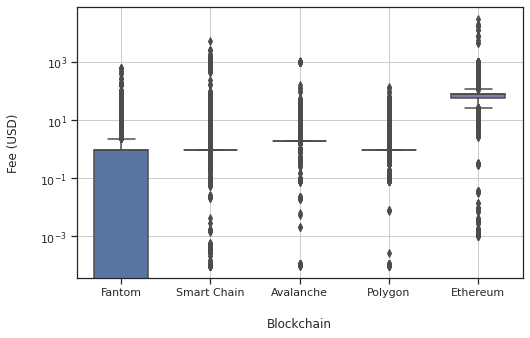

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.boxplot( x=df['To_Chain_ID_1'],y=df["Fee"]*df['Price'],width=0.6)
ax.set_xlabel('Blockchain', **{'fontsize': 12}, labelpad=20)
ax.set_ylabel('Fee (USD)', **{'fontsize': 12}, labelpad=20)
ax.set_yscale('log')
plt.grid()
plt.show()
fig.savefig('imgs/Fee per blockchain target.pdf', dpi=100, bbox_inches='tight')

In [20]:
df_path_time = df_path.merge(df[['_ID','Timestamp']], left_on='TxID_1', right_on='_ID').merge(df[['_ID','Timestamp']], left_on='TxID_2', right_on='_ID').drop(columns=['_ID_x','_ID_y','Unnamed: 0'],axis=1)

In [21]:
df_path_time['Time_diff']=df_path_time['Timestamp_y'] -df_path_time['Timestamp_x']

In [22]:
df_path_time['seconds']=df_path_time['Time_diff'].dt.total_seconds()


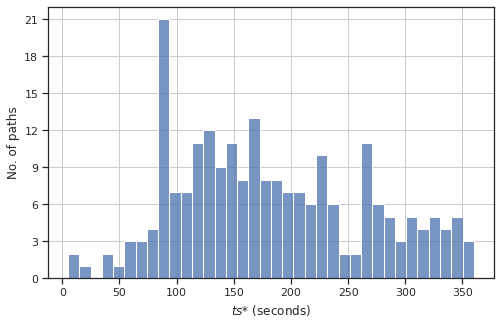

In [23]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(df_path_time, x='seconds', alpha=.75,bins=36)


#ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel('$ts$* (seconds)',**{'fontsize': 12})
ax.set_ylabel('No. of paths',**{'fontsize': 12})
#ax.set_yscale('log')
plt.grid()
plt.show()

fig.savefig('imgs/Grafici/swaps delay.pdf', dpi=100, bbox_inches='tight')